<a href="https://colab.research.google.com/github/Pateke/Simple-Predictive-Machine-Model/blob/main/MACHINE_LEARNING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**NIGERIA INFLATION RATE**

##**PROBLEM STATEMENT**##

The project aim:

* Create a predictive model.
* The model that takes values for select features of various consumer
  price index (CPI) components and
* Predict the inflation rates


##**DATA SOURCE**##

The dataset was obtained from an online data source (kaggle). Real life dataset stored in a csv file

https://www.kaggle.com/datasets/iamhardy/nigeria-inflation-rates

In [ ]:
#import statement/mport dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv("/content/drive/MyDrive/MY DATA ANALYTICS CLASS/NigeriaInflationRates.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education
0,2008,1,8.60,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466
1,2008,2,8.00,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619
2,2008,3,7.80,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847
3,2008,4,8.20,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248
4,2008,5,9.70,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442
...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024,2,31.70,86.08,1.32,0.87,846.846533,543.893969,494.844568,570.034088,234.228948,469.899712
194,2024,3,33.20,88.80,1.23,0.78,877.472863,558.813016,502.912687,579.821453,234.694654,476.890292
195,2024,4,33.69,93.12,1.28,0.83,899.453386,571.960431,510.095879,592.282753,235.335975,483.719840
196,2024,5,33.95,84.01,1.25,0.80,920.005281,583.894158,517.391784,606.408076,235.850405,490.779792


##**Examinig the Data**##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               198 non-null    int64  
 1   Month              198 non-null    int64  
 2   Inflation_Rate     198 non-null    float64
 3   Crude Oil Price    197 non-null    float64
 4   Production         197 non-null    float64
 5   Crude Oil Export   197 non-null    float64
 6   CPI_Food           198 non-null    float64
 7   CPI_Energy         198 non-null    float64
 8   CPI_Health         198 non-null    float64
 9   CPI_Transport      198 non-null    float64
 10  CPI_Communication  198 non-null    float64
 11  CPI_Education      198 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 18.7 KB


##**Removing Irregularities**##


##**Adressing null values**##

In [ ]:
# check for the null value
df.isnull().any(axis=1).sum()
print(df.isna().sum())

Year                 0
Month                0
Inflation_Rate       0
Crude Oil Price      1
Production           1
Crude Oil Export     1
CPI_Food             0
CPI_Energy           0
CPI_Health           0
CPI_Transport        0
CPI_Communication    0
CPI_Education        0
dtype: int64


In [ ]:
df['Crude Oil Price'] = df['Crude Oil Price'].fillna(df['Crude Oil Price'].mean())
df['Production'] = df['Production'].fillna(df['Production'].median())
df['Crude Oil Export'] = df['Crude Oil Export'].fillna(df['Crude Oil Export'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               198 non-null    int64  
 1   Month              198 non-null    int64  
 2   Inflation_Rate     198 non-null    float64
 3   Crude Oil Price    198 non-null    float64
 4   Production         198 non-null    float64
 5   Crude Oil Export   198 non-null    float64
 6   CPI_Food           198 non-null    float64
 7   CPI_Energy         198 non-null    float64
 8   CPI_Health         198 non-null    float64
 9   CPI_Transport      198 non-null    float64
 10  CPI_Communication  198 non-null    float64
 11  CPI_Education      198 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 18.7 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               198 non-null    int64  
 1   Month              198 non-null    int64  
 2   Inflation_Rate     198 non-null    float64
 3   Crude Oil Price    198 non-null    float64
 4   Production         198 non-null    float64
 5   Crude Oil Export   198 non-null    float64
 6   CPI_Food           198 non-null    float64
 7   CPI_Energy         198 non-null    float64
 8   CPI_Health         198 non-null    float64
 9   CPI_Transport      198 non-null    float64
 10  CPI_Communication  198 non-null    float64
 11  CPI_Education      198 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 18.7 KB


###**EXPLORATORY DATA ANALYSIS**##

In [ ]:
df["Inflation_Rate"]

,Inflation_Rate
0,8.60
1,8.00
2,7.80
3,8.20
4,9.70
...,...
193,31.70
194,33.20
195,33.69
196,33.95


In [ ]:
df["Inflation_Rate"].describe()

,Inflation_Rate
count,198.000000
mean,14.068232
std,5.456106
min,7.700000
25%,10.625000
50%,12.735000
75%,16.040000
max,34.190000


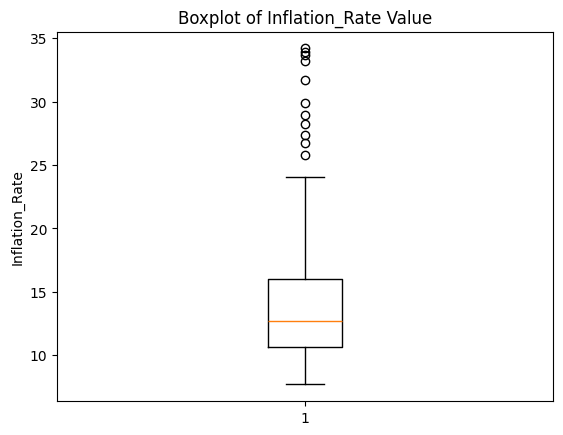

In [ ]:
plt.boxplot(df["Inflation_Rate"])
plt.title("Boxplot of Inflation_Rate Value")
plt.ylabel("Inflation_Rate")
plt.show()

##**Addressing Outliers**##

In [ ]:
Q1 = df["Inflation_Rate"].quantile(0.25)
Q3 = df["Inflation_Rate"].quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

10.625 16.04
5.414999999999999
2.5025000000000013
24.162499999999998


In [ ]:
df["Inflation_Rate"] = np.where(df["Inflation_Rate"] > upper_bound, upper_bound, df["Inflation_Rate"])

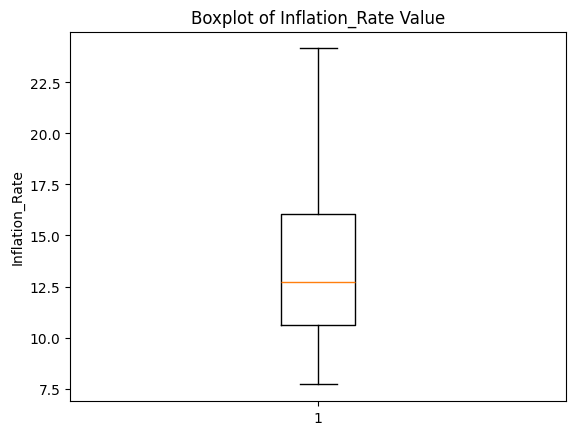

In [ ]:
plt.boxplot(df["Inflation_Rate"])
plt.title("Boxplot of Inflation_Rate Value")
plt.ylabel("Inflation_Rate")
plt.show()

##**Identifying Relevant Columns**##

In [ ]:
df[["Inflation_Rate","Crude Oil Price","Production","Crude Oil Export","CPI_Food","CPI_Energy","CPI_Transport","Year","Month"]].corr()



,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Transport,Year,Month
Inflation_Rate,1.000000,-0.141145,-0.745936,-0.748878,0.800314,0.768919,0.788999,0.632385,0.001738
Crude Oil Price,-0.141145,1.000000,0.159421,0.159455,-0.079887,-0.159344,-0.113606,-0.264881,-0.026655
Production,-0.745936,0.159421,1.000000,0.999789,-0.837206,-0.846849,-0.847551,-0.815089,-0.024292
Crude Oil Export,-0.748878,0.159455,0.999789,1.000000,-0.840051,-0.849546,-0.850473,-0.817486,-0.023275
CPI_Food,0.800314,-0.079887,-0.837206,-0.840051,1.000000,0.984782,0.995994,0.896639,-0.012418
CPI_Energy,0.768919,-0.159344,-0.846849,-0.849546,0.984782,1.000000,0.995091,0.953703,-0.003494
CPI_Transport,0.788999,-0.113606,-0.847551,-0.850473,0.995994,0.995091,1.000000,0.928694,-0.006995
Year,0.632385,-0.264881,-0.815089,-0.817486,0.896639,0.953703,0.928694,1.000000,-0.045545
Month,0.001738,-0.026655,-0.024292,-0.023275,-0.012418,-0.003494,-0.006995,-0.045545,1.000000


<Axes: >

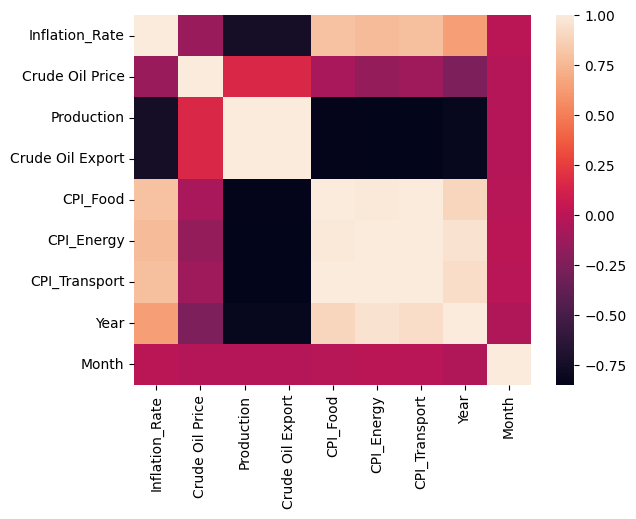

In [ ]:
sns.heatmap(df[["Inflation_Rate","Crude Oil Price","Production","Crude Oil Export","CPI_Food","CPI_Energy","CPI_Transport","Year","Month"]].corr())

In [ ]:
df["CPI_Food"]

,CPI_Food
0,75.534431
1,75.154185
2,78.242523
3,79.434268
4,80.783677
...,...
193,846.846533
194,877.472863
195,899.453386
196,920.005281


In [ ]:
df["CPI_Food"].describe()

,CPI_Food
count,198.000000
mean,276.715714
std,200.000754
min,75.154185
25%,129.971845
50%,196.133375
75%,357.349555
max,943.458769


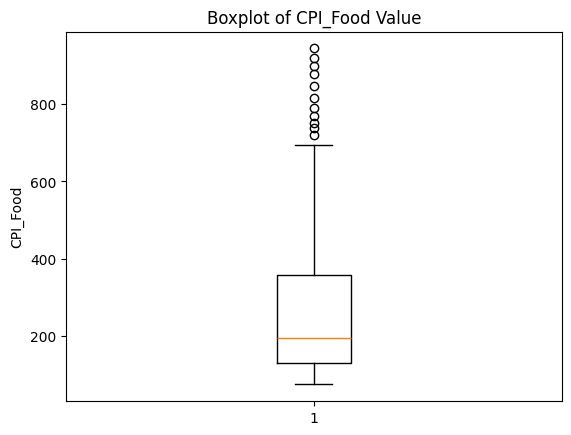

In [ ]:
plt.boxplot(df["CPI_Food"])
plt.title("Boxplot of CPI_Food Value")
plt.ylabel("CPI_Food")
plt.show()


##**Addressing CPI_FOOD Outliers**##

In [ ]:
Q1 = df["CPI_Food"].quantile(0.25)
Q3 = df["CPI_Food"].quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

129.971844875 357.349555225
227.37771035000003
-211.09472065000006
698.4161207500001


In [ ]:
df["CPI_Food"] = np.where(df["CPI_Food"] > upper_bound, upper_bound, df["CPI_Food"])

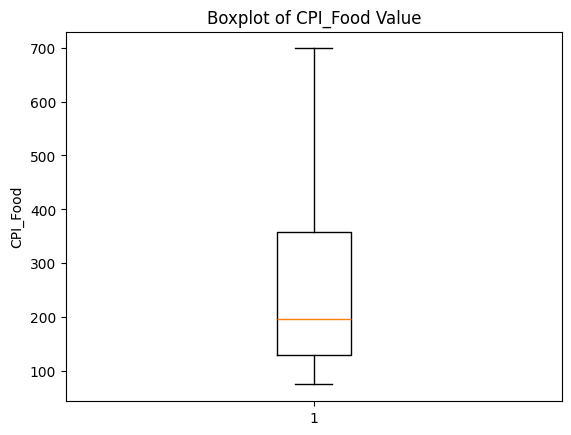

In [ ]:
plt.boxplot(df["CPI_Food"])
plt.title("Boxplot of CPI_Food Value")
plt.ylabel("CPI_Food")
plt.show()


Text(0, 0.5, 'Inflation_Rate')

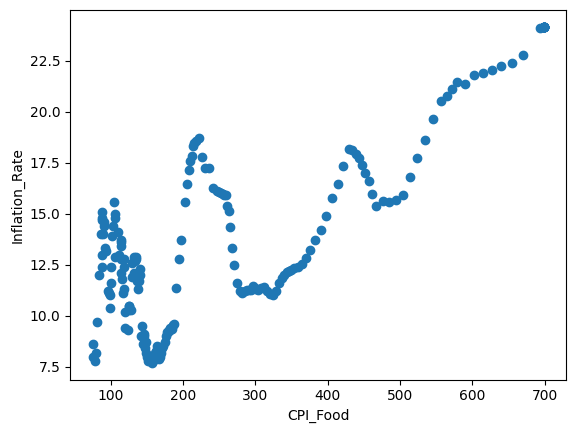

In [ ]:
#Plotting a scatter plot of CPI_Food against Inflation Rate
plt.scatter(x=df["CPI_Food"],y=df["Inflation_Rate"])
plt.xlabel("CPI_Food")
plt.ylabel("Inflation_Rate")

##**Training And Testing Model**##

In [ ]:
model_df=df[["CPI_Food","Inflation_Rate"]]
model_df

,CPI_Food,Inflation_Rate
0,75.534431,8.6000
1,75.154185,8.0000
2,78.242523,7.8000
3,79.434268,8.2000
4,80.783677,9.7000
...,...,...
193,698.416121,24.1625
194,698.416121,24.1625
195,698.416121,24.1625
196,698.416121,24.1625


In [ ]:
#divide data into feature matrix and taget vector
feature = ["CPI_Food"]
target = "Inflation_Rate"

X= model_df[feature]
y= model_df[target]

In [ ]:
# splitting data into training and testing sets
X_train, X_test,y_train,y_test =train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(158, 1) (40, 1) (158,) (40,)


##**EVALUATING MODEL PERFORMERS**##

##**Reodering the Model Creation and Performance Evaluation Steps**##

**Baselining**

In [ ]:
# let's create baseline model

baseline_model =y_train.mean()
baseline_model

13.838939873417724

In [ ]:
# let create prediction using the baseline model

baseline_pred=[baseline_model] * len(y_test)
baseline_pred

[13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724,
 13.838939873417724]

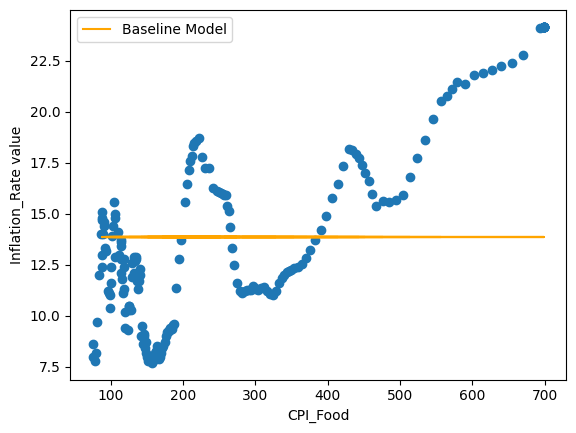

In [ ]:
# visualing the baseline on scatterplot
plt.plot(X_test.values,baseline_pred, color="orange",label="Baseline Model")
plt.scatter(X,y)
plt.xlabel("CPI_Food")
plt.ylabel("Inflation_Rate value")
plt.legend()


##**Evaluate Baseline Performance**##

MAE[Mean Absolute Error] evaluation metric will be used

In [ ]:
#MAE for baseline model

baseline_mae= mean_absolute_error(y_test,baseline_pred)

print("The mean value of y_train value is:",round(baseline_model,2))
print("The baseline MAE is:",round(baseline_mae,2))

The mean value of y_train value is: 13.84
The baseline MAE is: 3.45


##**Build and Evaluate Model**##

In [ ]:
# lets create a linear regression model

model= LinearRegression()

**Model Fitting (Training)**

In [ ]:
# to fit a model means to train it using the X_train and y_train values
model.fit(X_train,y_train)

LinearRegression()

##**Test Model With Training Data**##

In [ ]:
# we'd generate prediction using X_train
model_train_pred=model.predict(X_train)
model_train_pred

array([14.73197103, 10.20179801, 11.4533813 , 14.80960642, 12.69710853,
       18.40340064, 12.36184537, 13.15704649, 10.29890308, 10.80666487,
       21.65527268, 10.90445573, 11.46722709, 22.21663851, 11.66521105,
       12.19217116, 11.74036508, 10.70069512, 17.04018155, 17.29978005,
       11.13787381, 18.03384353, 10.85975491, 10.77565111, 12.27654455,
       18.8027883 , 10.8991627 , 17.50384726, 22.21663851, 10.60897319,
       14.88619178, 12.06115561, 12.51049677, 10.07937302, 11.00138669,
       14.56407761, 22.21663851, 14.39684579, 10.78572623, 13.7912399 ,
       10.50518328, 15.56625661, 15.38736539, 10.77868741, 10.28293065,
       14.14858229, 19.59376075, 10.2450869 , 10.63356594, 12.96735484,
       10.12910534, 10.77878243, 12.121923  , 15.19973422, 21.3484838 ,
       15.13558345, 10.27267563, 11.37880664, 12.56767783, 15.26534531,
       10.02637362, 19.72922623, 20.81312188, 11.53968667, 13.27389726,
       11.41263743, 10.9902348 , 14.20461105, 10.6162504 , 10.86

##**Evaluate Model Perfomance 1**

In [ ]:
# Calculate Model Mae for training data

model_train_mae= mean_absolute_error(y_train,model_train_pred)
round(model_train_mae,2)

2.42

##**Compare Baseline MAE with Model training MAE**##

In [ ]:
#print baseline and model (train)maebto compare both

print("The baseline MAE is:\t\t",round(baseline_mae,2))
print("The model(train)MAE is:\t\t",round(model_train_mae,2))

The baseline MAE is:		 3.45
The model(train)MAE is:		 2.42


##**Test Model with Testing Data**##

In [ ]:
# Model generate prediction off X_test Values
model_test_pred=model.predict(X_test)
model_test_pred

array([11.43400176, 13.44134421, 10.37794842, 15.05422469, 16.6468535 ,
       14.07012435, 14.96862858, 10.73239974, 10.46343718, 17.88239209,
       16.95683492, 10.34119369, 11.20854436, 11.23844364, 13.49734513,
       10.99407399, 13.90941251, 10.27067908, 15.46806357, 11.89657182,
       13.36816435, 17.22510133, 11.33343308, 22.21663851, 11.61000641,
       11.49232913, 13.65633122, 17.39270387, 13.58240573, 19.43764745,
       11.51594122, 11.69045062, 13.99363917, 11.81324513, 10.57760086,
       22.21663851, 12.22585759, 18.60025383, 10.48358421, 15.7789971 ])

##**Evaluate Model Perfomance 2**##

In [ ]:
#calculate model MAE for test data
model_test_mae= mean_absolute_error(y_test,model_test_pred)
round(model_test_mae,2)

2.33

##**Compare Model Baseline, Train Model MAE and Test Model MAE**##

In [ ]:
#print baseline model(train) and Model(test) MAEs to compare the three of them
print("The baseline MEA is:\t\t",round(baseline_mae,2))
print("The model(train) MAE is:\t",round(model_train_mae,2))
print("The model(Test) MAE is:\t\t", round(model_test_mae,2))

The baseline MEA is:		 3.45
The model(train) MAE is:	 2.42
The model(Test) MAE is:		 2.33
